In [1]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# === Path to the dataset ===
cat_dog_path = "C:/Users/Acer/Desktop/task3/data"  # Update this to match your local files
categories = ["cat", "dog"]  # Two categories only: "cats" and "dogs"

# === Parameters ===
img_size = 64  # Normalized image size

# === Function to load data from the folder ===
def load_data_from_folder(folder_path, categories):
    data = []
    labels = []
    valid_extensions = (".jpg", ".jpeg", ".png")  # Valid image extensions
    for category in categories:
        path = os.path.join(folder_path, category)
        label = categories.index(category)  # cats=0, dogs=1
        for file in os.listdir(path):
            if not file.lower().endswith(valid_extensions):
                continue
            try:
                img_path = os.path.join(path, file)
                img = cv2.imread(img_path, cv2.IMREAD_COLOR)
                if img is None:
                    print(f"Unable to read file: {img_path}. Skipping.")
                    continue  # Skip to the next file
                
                # Resize the image
                try:
                    img = cv2.resize(img, (img_size, img_size))
                except Exception as e:
                    print(f"Error resizing {img_path}: {e}")
                    continue
                
                data.append(img)
                labels.append(label)
            except Exception as e:
                print(f"Error with file {file}: {e}")
    return np.array(data), np.array(labels)

# === Load data ===
print("Loading data...")
data, labels = load_data_from_folder(cat_dog_path, categories)
print(f"Data loaded: {len(data)} images.")

Loading data...
Data loaded: 8005 images.


In [5]:
# === Split data into training and testing sets ===
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# === Normalize data ===
X_train = X_train / 255.0  # Scale to the range [0, 1]
X_test = X_test / 255.0

# === Flatten images for SVM ===
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)


Training with kernel 'linear'...
Accuracy with kernel 'linear': 0.5459

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.58      0.56       819
           1       0.54      0.51      0.53       782

    accuracy                           0.55      1601
   macro avg       0.55      0.55      0.55      1601
weighted avg       0.55      0.55      0.55      1601

Confusion Matrix:
 [[472 347]
 [380 402]]


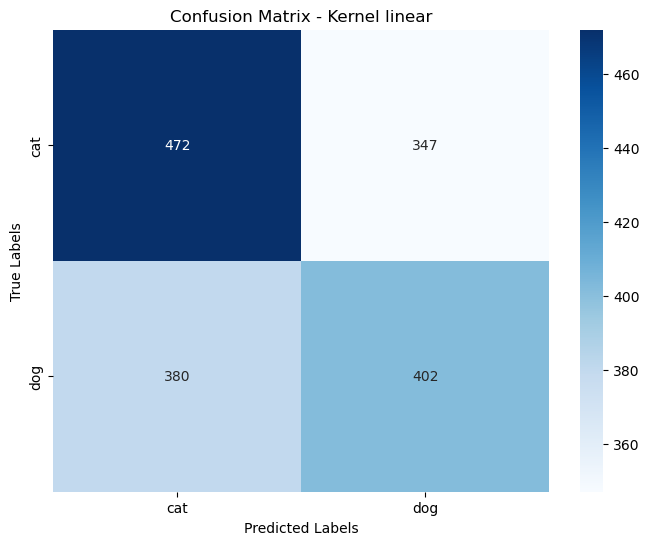


Training with kernel 'rbf'...
Accuracy with kernel 'rbf': 0.6540

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       819
           1       0.64      0.66      0.65       782

    accuracy                           0.65      1601
   macro avg       0.65      0.65      0.65      1601
weighted avg       0.65      0.65      0.65      1601

Confusion Matrix:
 [[531 288]
 [266 516]]


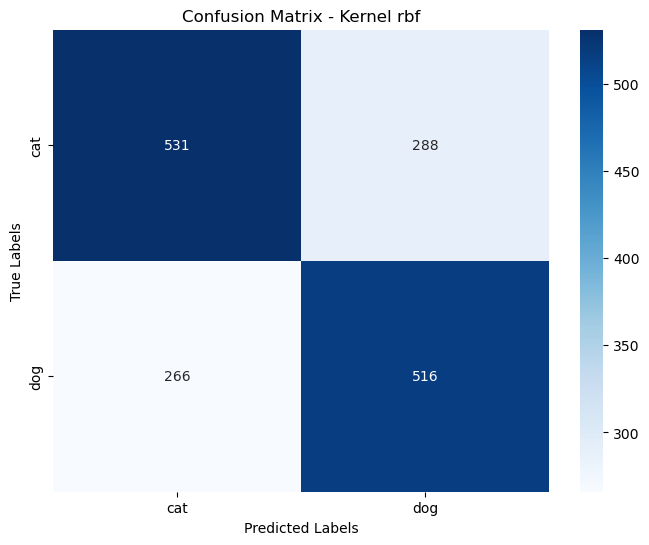


Training with kernel 'poly'...
Accuracy with kernel 'poly': 0.6309

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.66      0.65       819
           1       0.63      0.60      0.61       782

    accuracy                           0.63      1601
   macro avg       0.63      0.63      0.63      1601
weighted avg       0.63      0.63      0.63      1601

Confusion Matrix:
 [[541 278]
 [313 469]]


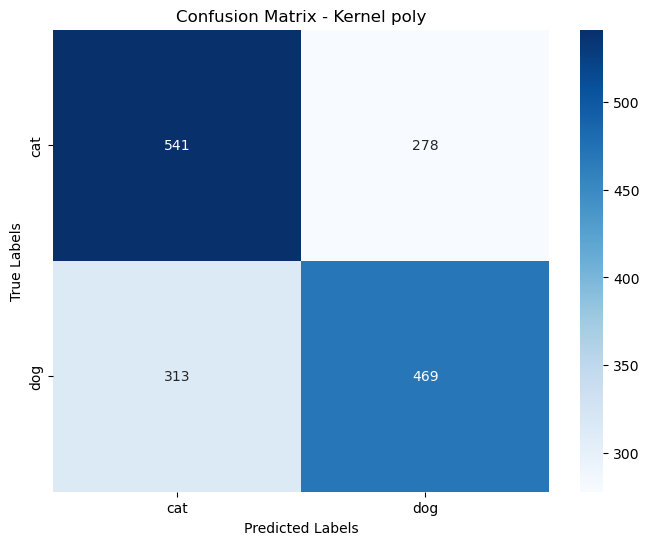


Training with kernel 'sigmoid'...
Accuracy with kernel 'sigmoid': 0.4728

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.46      0.47       819
           1       0.46      0.49      0.47       782

    accuracy                           0.47      1601
   macro avg       0.47      0.47      0.47      1601
weighted avg       0.47      0.47      0.47      1601

Confusion Matrix:
 [[376 443]
 [401 381]]


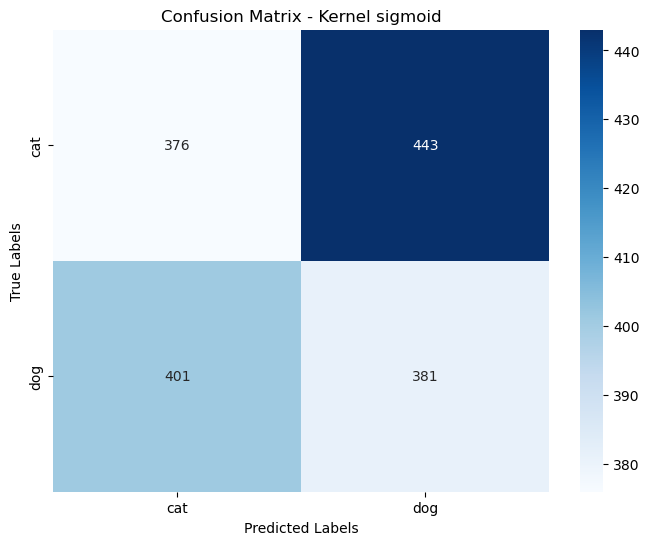


=== Results by Kernel ===
linear: 0.5459
rbf: 0.6540
poly: 0.6309
sigmoid: 0.4728


In [7]:
# === Train and evaluate with different kernels ===
results = {}  # To store results by kernel
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

for kernel in kernels:
    print(f"\nTraining with kernel '{kernel}'...")
    
    # SVM model
    svm_model = SVC(kernel=kernel, gamma='scale', C=1.0, random_state=42)
    svm_model.fit(X_train_flat, y_train)  # Train the model
    
    # Predictions
    y_pred = svm_model.predict(X_test_flat)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[kernel] = accuracy
    print(f"Accuracy with kernel '{kernel}': {accuracy:.4f}")
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)
    
    # Display confusion matrix with Seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
    plt.title(f'Confusion Matrix - Kernel {kernel}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# === Display results for each kernel ===
print("\n=== Results by Kernel ===")
for kernel, accuracy in results.items():
    print(f"{kernel}: {accuracy:.4f}")


In [9]:
# === Best-performing kernel ===
best_kernel = max(results, key=results.get)
print(f"Best kernel: '{best_kernel}' with accuracy {results[best_kernel]:.4f}")

Best kernel: 'rbf' with accuracy 0.6540


In [13]:
# === Final evaluation with the best kernel ===
print("\nEvaluating with the best kernel...")
best_model = SVC(kernel=best_kernel, gamma='scale', C=1.0, random_state=42)
best_model.fit(X_train_flat, y_train)
y_pred = best_model.predict(X_test_flat)

# AUC and ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.4f}")


Evaluating with the best kernel...
AUC: 0.6541


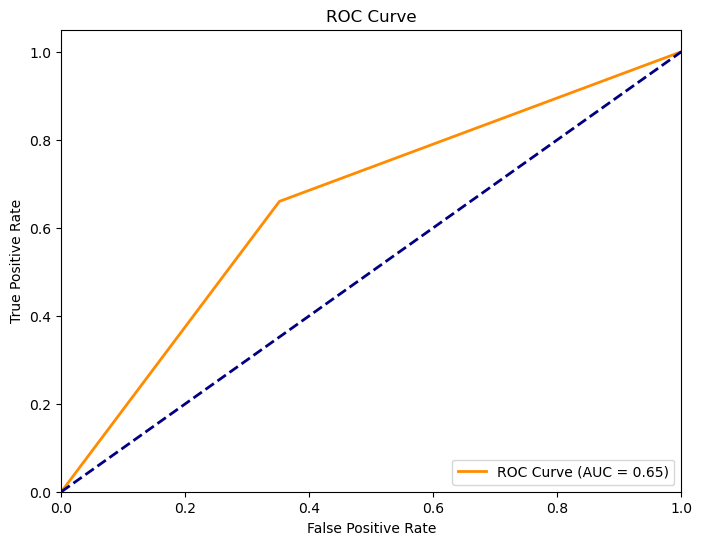

In [15]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()